# Mini Project 2

Load the data
1. Load wine data from the two source files winequality-red.xlsx and winequality-
white.xslx.
2. Clean the data in both files.
3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
red_data = pd.read_csv('winequality-red.csv', header=0, sep=';')
white_data = pd.read_csv('winequality-white.csv', header=0, sep=';')

In [13]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [45]:
red_data.shape

(1599, 13)

In [49]:
white_data.shape

(4898, 13)

In [31]:
white_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
88,7.1,0.43,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5,white
2481,6.4,0.37,0.37,4.85,0.041,39.5,216.5,0.99432,3.10,0.50,9.8,6,white
3502,6.7,0.29,0.45,14.30,0.054,30.0,181.0,0.99869,3.14,0.57,9.1,5,white
1416,6.6,0.23,0.26,1.30,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,white
2715,7.8,0.25,0.28,7.20,0.040,46.0,179.0,0.99541,3.14,0.60,10.1,6,white


In [27]:
white_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
red_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [29]:
# Add new column defining wine type
red_data['type'] = 'red'
white_data['type'] = 'white'

In [35]:
# Combine the two dataframes
df = pd.concat([red_data, white_data])

## Step 2
Explore the features of the original and the new files:
1. number of rows and columns
2. type of data in each column

In [43]:
df.shape

(6497, 13)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [55]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

## Step 3
Calculate the descriptive statistics of the numeric data. Check if the values of the attributes are
normally distributed.

In [53]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

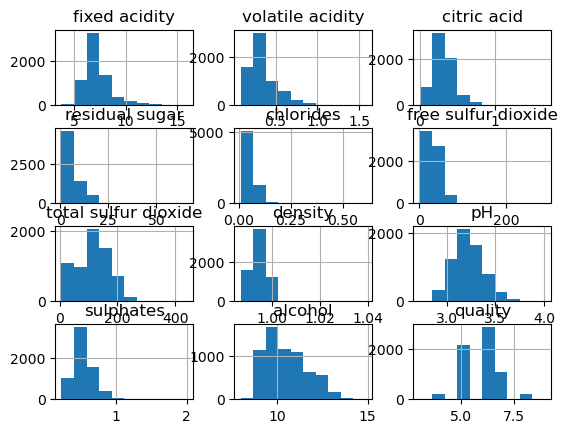

In [109]:
df.hist()
#df['fixed acidity'].plot.density()

<Axes: >

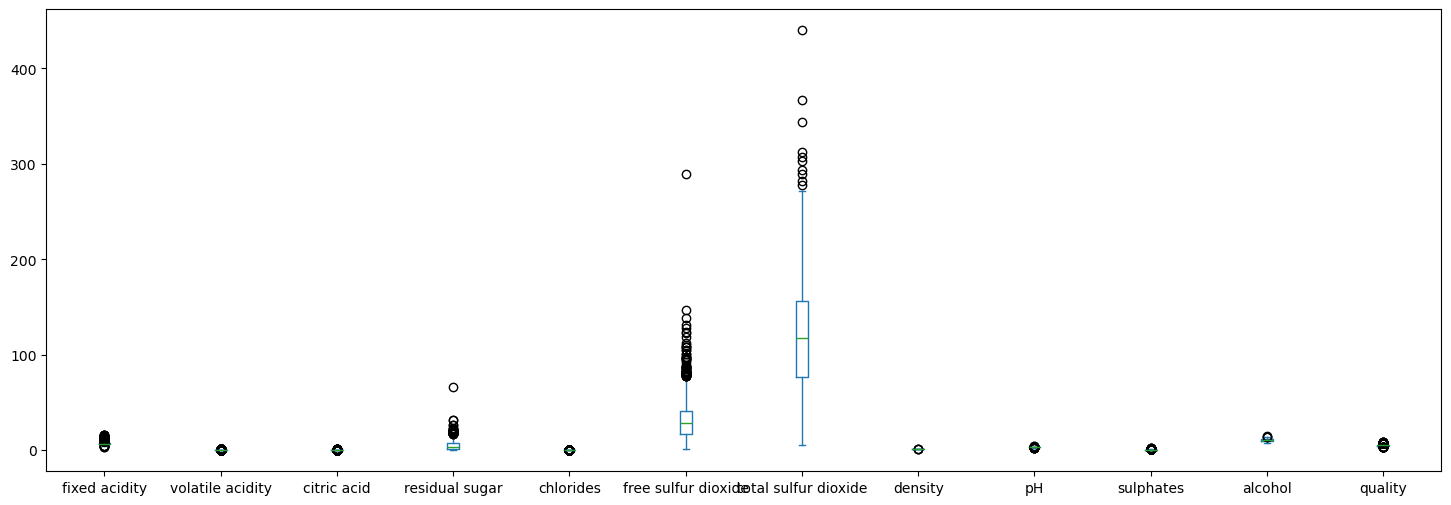

In [139]:
df.plot.box(widths=0.1, figsize=(18, 6))

<Axes: >

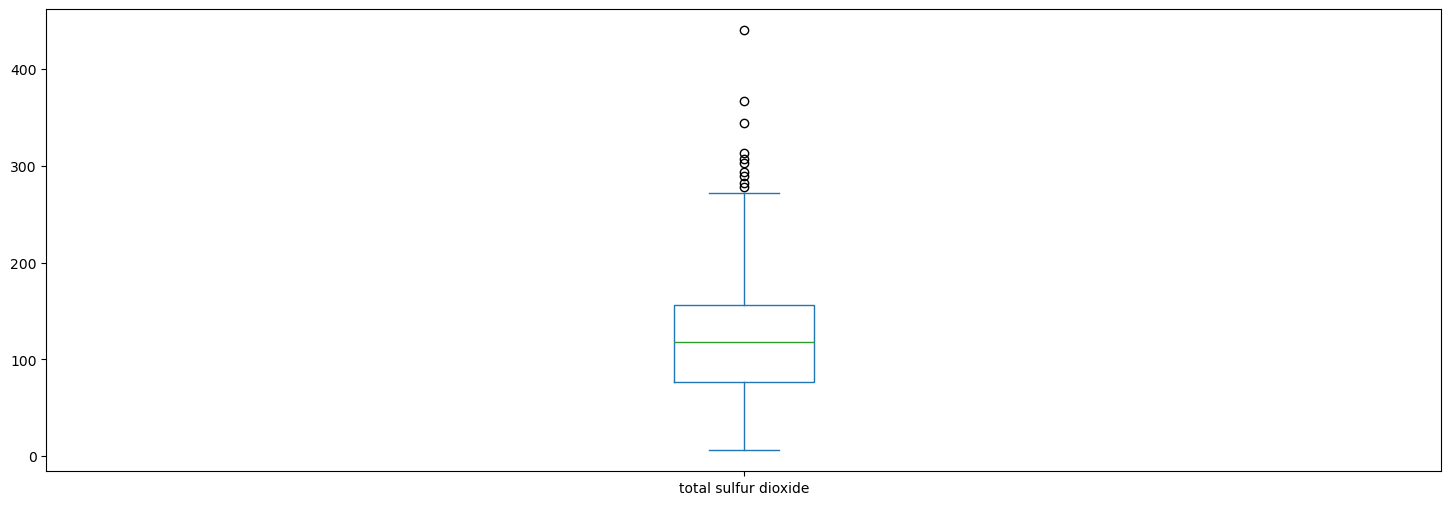

In [137]:
df['total sulfur dioxide'].plot.box(widths=0.1, figsize=(18, 6))

## Step 4
Plot diagrams that visualize the differences in red and white wine samples. Use as many
diagrams as appropriate. Use the diagrams as a support for answering the following questions:
1. what do diagrams show exactly?
2. which type of wine has higher average quality, how big is the difference?
3. which type of wine has higher average level of alcohol?
4. which one has higher average quantity of residual sugar?
5. do the quantity of alcohol and residual sugar influence the quality of the wine?

<Axes: xlabel='type'>

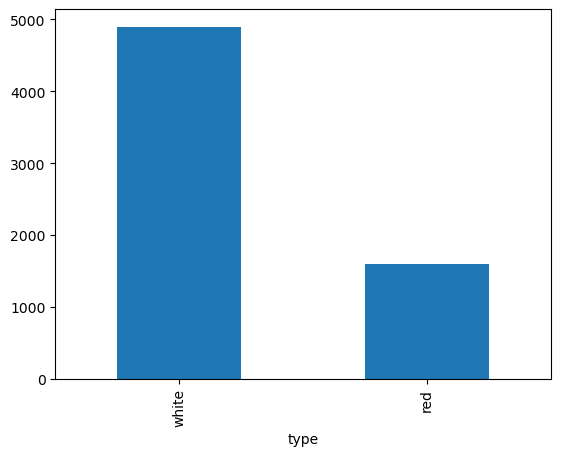

In [70]:
df['type'].value_counts().plot(kind='bar')

### Quality red vs. white

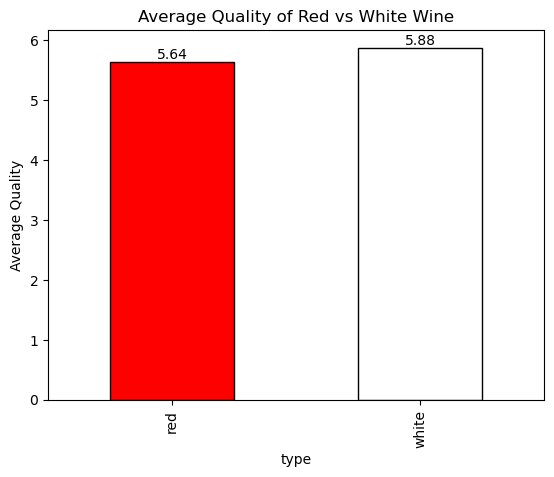

In [99]:
avg_quality = df.groupby('type')['quality'].mean()
avg_quality.plot(kind='bar', color=['red', 'white'], edgecolor='black')
# Add labels and title
plt.ylabel('Average Quality')
plt.title('Average Quality of Red vs White Wine')

# Display the values on the bars
for index, value in enumerate(avg_quality):
    plt.text(index, value + 0.05, round(value, 2), ha='center')

# Show the plot
plt.show()

### Alcohol red vs. white

<Axes: title={'center': 'Average alcohol-% red vs. white'}, xlabel='type', ylabel='Average alcohol-%'>

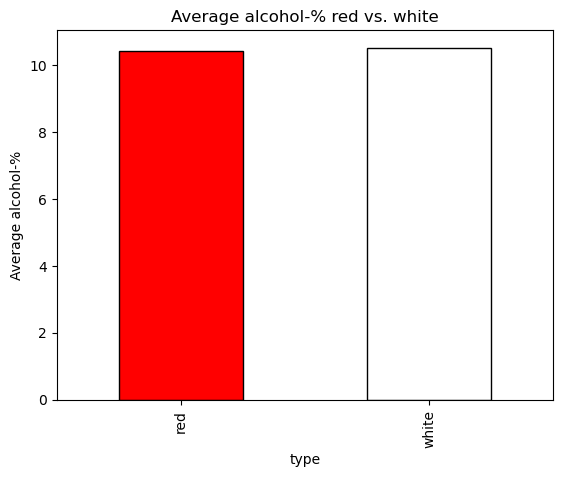

In [141]:
# new df where results are saved by type (red or white) and the average of the types are calculated
avg_alcohol = df.groupby('type')['alcohol'].mean()

# creates a plot diagram with customized labels and colors
avg_alcohol.plot(kind='bar', color=['red', 'white'], edgecolor='black', title='Average alcohol-% red vs. white', ylabel='Average alcohol-%')

### Residual sugar red vs. white

<Axes: title={'center': 'Average res. sugar red vs. white'}, xlabel='type', ylabel='Average sugar'>

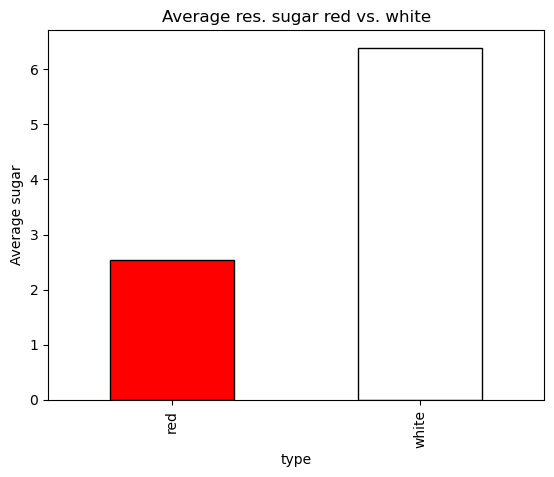

In [144]:
avg_residual_sugar = df.groupby('type')['residual sugar'].mean()
avg_residual_sugar.plot(kind='bar', color=['red', 'white'], edgecolor='black', title='Average res. sugar red vs. white', ylabel='Average sugar')

### Does alcohol and residual sugar influence quality?

<Axes: xlabel='residual sugar', ylabel='quality'>

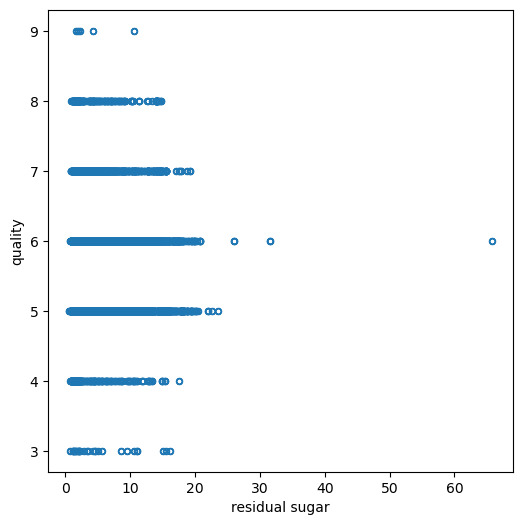

In [159]:
df.plot.scatter(x='residual sugar', y='quality', figsize=(6, 6), marker = '$\u25EF$')

<Axes: xlabel='alcohol', ylabel='quality'>

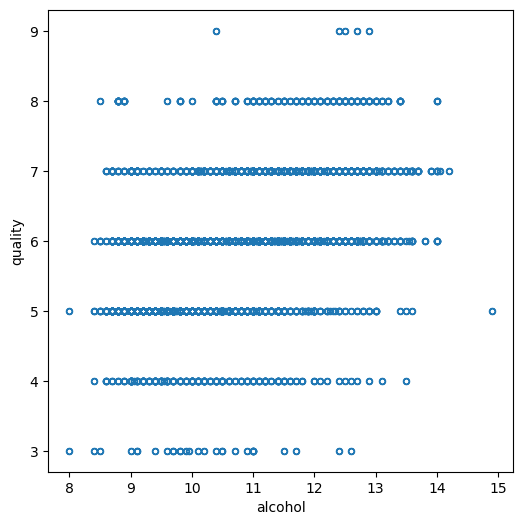

In [169]:
df.plot.scatter(x='alcohol', y='quality', figsize=(6, 6), marker = '$\u25EF$')

## Splitting into bins

Split the aggregated data into five subsets by binning the attribute pH. Which subset has highest
density? What if you split the data in ten subsets?

In [173]:
df.pH.describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [206]:
#split in five bins
#bins = [2.5, 2.8, 3.1, 3.4, 3.7, 4.01]
#pH = df.groupby([(pd.cut(df.pH, bins))]).count()

# creates a new column defining which bin a row is added to
df['pH_bin_5'] = pd.cut(df['pH'], bins=5)
# groups by bin and calculates the average density for each bin
avg_density_5 = df.groupby('pH_bin_5')['density'].mean()
avg_density_5

/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_93623/4170073673.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_density_5 = df.groupby('pH_bin_5')['density'].mean()


pH_bin_5
(2.719, 2.978]    0.994801
(2.978, 3.236]    0.994679
(3.236, 3.494]    0.994688
(3.494, 3.752]    0.994887
(3.752, 4.01]     0.993582
Name: density, dtype: float64

In [222]:
#gets the name of the bin with the highest value
max_bin_5 = avg_density_5.idxmax()
#gets the max value
max_value_5 = avg_density_5.max()
print(f"Bin: {max_bin_5} Value: {max_value_5}")

Bin: (3.494, 3.752] Value: 0.9948868322981367


In [210]:
#split in 10 bins
#bins = [2.5, 2.65, 2.8, 2.95, 3.1, 3.25, 3.4, 3.55, 3.7, 3.85, 4.01]
#pH = df.groupby([(pd.cut(df.pH, bins))]).count()
#pH

# creates a new column defining which bin a row is added to
df['pH_bin_10'] = pd.cut(df['pH'], bins=10)
# groups by bin and calculates the average density for each bin
avg_density_10 = df.groupby('pH_bin_10')['density'].mean()
avg_density_10

/var/folders/17/dk6q659s09b4tj9wzhpz5dpm0000gn/T/ipykernel_93623/3198746957.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_density_10 = df.groupby('pH_bin_10')['density'].mean()


pH_bin_10
(2.719, 2.849]    0.993112
(2.849, 2.978]    0.994882
(2.978, 3.107]    0.994706
(3.107, 3.236]    0.994664
(3.236, 3.365]    0.994515
(3.365, 3.494]    0.995044
(3.494, 3.623]    0.994942
(3.623, 3.752]    0.994640
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64

In [216]:
#gets the name of the bin with the highest value
max_bin_10 = avg_density_10.idxmax()
#gets the max value
max_value_10 = avg_density_10.max()
print(f"Bin: {max_bin_10} Value: {max_value_10}")

Interval(3.365, 3.494, closed='right')

## Correlation heatmap

In [186]:
# heatmap correlation only work for numeric data, get the numeric data in new data frame
ndf = df.select_dtypes(include=[np.number])

In [230]:
# Correlation matrix
correlation = ndf.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


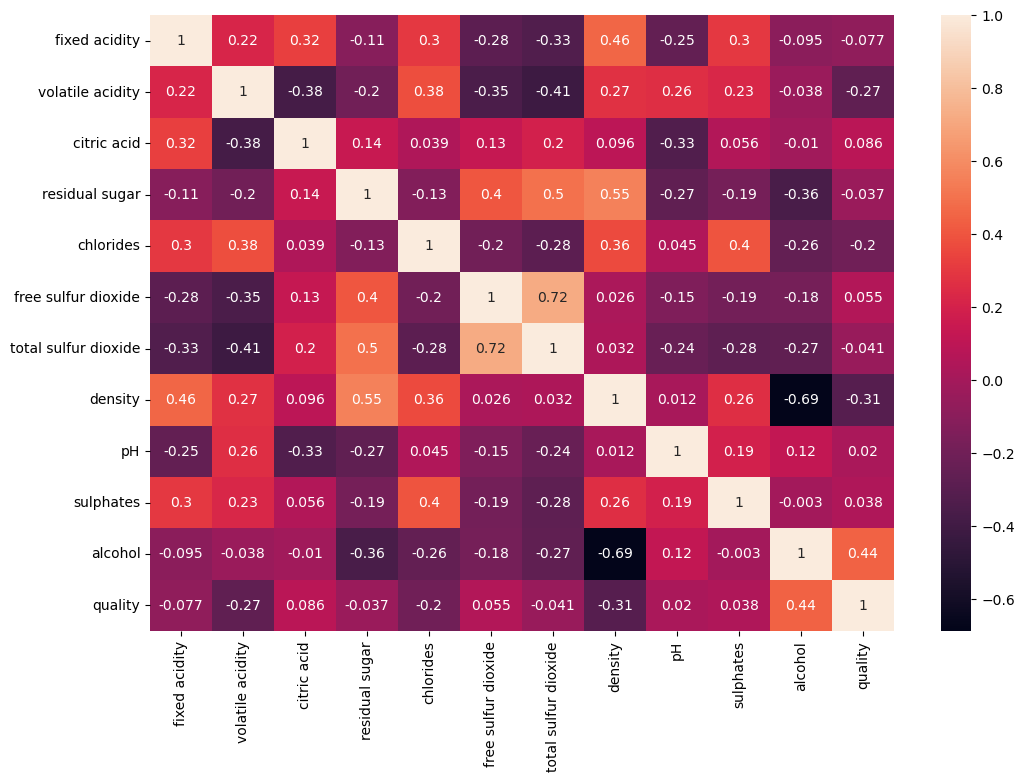

In [240]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True)
plt.show()

## Prepare the data for further analysis

### 11

Explore the feature ‘residual sugar’. Does it contain outliers? On which rows of the data frame are they found? Remove those rows.

Z-score is a statistical measurement that describes a value's relationship to the mean of a group of values. To spot outliers with the z-score, set a threshold—commonly 3. This means any z-score beyond 3 or below -3 is an outlier. It captures about 0.3% of data in a normal distribution.

<Axes: >

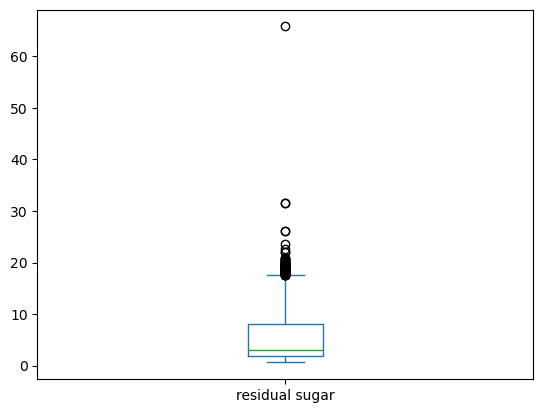

In [244]:
# visualize outliers
df['residual sugar'].plot.box()

In [250]:
# calculates the z score for each row in the defined coloum
z_residual_sugar = stats.zscore(df['residual sugar'])
z_residual_sugar

0      -0.744778
1      -0.597640
2      -0.660699
3      -0.744778
4      -0.744778
          ...   
4893   -0.807837
4894    0.537425
4895   -0.891916
4896   -0.912936
4897   -0.975995
Name: residual sugar, Length: 6497, dtype: float64

In [253]:
# filter out rows based on the z-score
# uses numpy to get absolute value of the z_residual_sugar value, and only keep rows where the z-score is lower than 3
# gives me 6471 rows vs. 6497 rows before the filter - outliers sorted out
df_res_sugar = df[np.abs(z_residual_sugar) < 3]
df_res_sugar

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,pH_bin_5,pH_bin_10
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(3.494, 3.752]","(3.494, 3.623]"
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,"(2.978, 3.236]","(3.107, 3.236]"
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,"(3.236, 3.494]","(3.236, 3.365]"
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,"(2.978, 3.236]","(3.107, 3.236]"
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,"(3.494, 3.752]","(3.494, 3.623]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,"(3.236, 3.494]","(3.236, 3.365]"
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,"(2.978, 3.236]","(3.107, 3.236]"
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,"(2.978, 3.236]","(2.978, 3.107]"
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,"(3.236, 3.494]","(3.236, 3.365]"


### 12
Remove the attributes with the lowest correlation to the wine quality and any one highly correlated to another independent attribute.

In [305]:
corr_threshold = 0.25
corr_quality = correlation['quality'].drop('quality')

# Identify the attributes with low correlation to 'quality'
low_corr_attributes = corr_quality[corr_quality.abs() < corr_threshold].index

# Drop the attributes with low correlation to quality
df_filtered = df_res_sugar.drop(columns=low_corr_attributes)

df_filtered

,volatile acidity,density,alcohol,quality,type,pH_bin_5,pH_bin_10
0,0.70,0.99780,9.4,5,red,"(3.494, 3.752]","(3.494, 3.623]"
1,0.88,0.99680,9.8,5,red,"(2.978, 3.236]","(3.107, 3.236]"
2,0.76,0.99700,9.8,5,red,"(3.236, 3.494]","(3.236, 3.365]"
3,0.28,0.99800,9.8,6,red,"(2.978, 3.236]","(3.107, 3.236]"
4,0.70,0.99780,9.4,5,red,"(3.494, 3.752]","(3.494, 3.623]"
...,...,...,...,...,...,...,...
4893,0.21,0.99114,11.2,6,white,"(3.236, 3.494]","(3.236, 3.365]"
4894,0.32,0.99490,9.6,5,white,"(2.978, 3.236]","(3.107, 3.236]"
4895,0.24,0.99254,9.4,6,white,"(2.978, 3.236]","(2.978, 3.107]"
4896,0.29,0.98869,12.8,7,white,"(3.236, 3.494]","(3.236, 3.365]"


### 13
Transform the categorical data into numeric, applying appropriate coding methods.

In [287]:
# initialize labelencoder and onehotencoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(sparse_output=False)

In [307]:
# find none numeric columns (categorical data)
df_cat = df_filtered.select_dtypes(exclude=[np.number]).columns
df_cat

Index(['type', 'pH_bin_5', 'pH_bin_10'], dtype='object')

In [311]:
# label encode each categorical
for i in df_cat:
    df_filtered[i] = label_encoder.fit_transform(df_filtered[i])

# onehot encode
encoded = onehot_encoder.fit_transform(df_filtered[df_cat])

In [315]:
# put onehot encoded data in a dataframe
df_onehot = pd.DataFrame(encoded, columns = onehot_encoder.get_feature_names_out(df_cat))

In [317]:
# sample of 10 rows from new one hot encoded dataset
df_onehot.sample(10)

,type_0,type_1,pH_bin_5_0,pH_bin_5_1,pH_bin_5_2,pH_bin_5_3,pH_bin_5_4,pH_bin_10_0,pH_bin_10_1,pH_bin_10_2,pH_bin_10_3,pH_bin_10_4,pH_bin_10_5,pH_bin_10_6,pH_bin_10_7,pH_bin_10_8,pH_bin_10_9
3738,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3320,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2029,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4330,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1766,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6054,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2210,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
